# Try Again with Values from Supplemental Info Section

## Load/Prep the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

C:\Users\noahw\Anaconda3\envs\ipykernel_py3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [7]:
solar=pd.read_csv('../deepsolar_tract.csv',encoding = "ISO-8859-1")
solar.head()
solar_fields=pd.read_csv('../deepsolar fields.csv')
solar_fields.head()

,Field,Description,Unit,Data Type,Formula,Possible Values,Observed Max,Observed Min,Theoretical Min,Theoretical Max,Relevant Feature,Mentioned in Supplemental Info,API documentation,API Field Name,API In Line With Collected Data
0,Unnamed: 0,Index,NaN,Numeric,NaN,NaN,72537.000,0,NaN,NaN,0,NaN,NaN,NaN,NaN
1,tile_count,total number of tiles in census tract,NaN,Numeric,NaN,NaN,4468.000,0,0.0,NaN,0,NaN,NaN,NaN,NaN
2,solar_system_count,Total number of solar systems in census tract,NaN,Numeric,NaN,NaN,1535.000,0,0.0,NaN,0,NaN,NaN,NaN,NaN
3,total_panel_area,NaN,NaN,Numeric,NaN,NaN,592031.075,0,0.0,NaN,0,NaN,NaN,NaN,NaN
4,fips,FIPS identifier for the census tract,NaN,String,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


## Pre-process data; impute missing values using median

In [8]:
#define relevant features and dependent variable


features=solar_fields.loc[(solar_fields['Mentioned in Supplemental Info']==1)]['Field'].tolist()
all_variables=features+['number_of_solar_system_per_household']

#all_variables=features+['number_of_solar_system_per_household']+['incentive_count_residential']+['incentive_residential_state_level']

solar2=solar[all_variables].loc[(np.isfinite(solar['number_of_solar_system_per_household']))
                                   & (solar['population']>100) & (solar['household_count']>=100)]

#Create binary version of number_of_solar_system_per_household for RF classifier

solar2['solar_flag']=solar2['number_of_solar_system_per_household'].apply(lambda x: int(x>0))
#solar2=solar2.loc[np.isfinite(solar2['number_of_solar_system_per_household'])]

#designate independent variable frame
independent_vars=solar2.loc[:,~solar2.columns.isin(['number_of_solar_system_per_household','solar_flag'])]
X=independent_vars.values
yc=solar2['solar_flag'].values
yr=solar2['number_of_solar_system_per_household'].values

#impute missing values
missing_val_imputer=Imputer(strategy='median')
X=missing_val_imputer.fit_transform(X)

#standardize the data
scalar=StandardScaler(copy=True, with_mean=True, with_std=True)
#X=scalar.fit_transform(X)
#X = (X - X.mean())/(X.max() - X.min())

X_train, X_test, yc_train, yc_test,yr_train,yr_test = train_test_split(X, yc,yr, test_size=0.3, random_state=42)



print('training data shape: ',X_train.shape)
print('classifier train labels shape: ',yc_train.shape)
print('regressor train labels shape: ',yr_train.shape)
print('test data shape: ',X_test.shape)
print('classifier test labels shape: ',yc_test.shape)
print('regressor test labels shape: ',yr_test.shape)


training data shape:  (50037, 95)
classifier train labels shape:  (50037,)
regressor train labels shape:  (50037,)
test data shape:  (21445, 95)
classifier test labels shape:  (21445,)
regressor test labels shape:  (21445,)


## Alternatively, pre-process values using group median by state

In [9]:
features=solar_fields.loc[(solar_fields['Mentioned in Supplemental Info']==1)]['Field'].tolist()
#all_variables=features+['number_of_solar_system_per_household']+['state']
all_variables=features+['number_of_solar_system_per_household']+['county']+['state']
solar2=solar[all_variables]

#Create binary version of number_of_solar_system_per_household for RF classifier

solar2['solar_flag']=solar2['number_of_solar_system_per_household'].apply(lambda x: int(x>0))
solar2=solar2.loc[np.isfinite(solar2['number_of_solar_system_per_household'])]

#designate independent variable frame
independent_vars=solar2.loc[:,~solar2.columns.isin(['number_of_solar_system_per_household','solar_flag'])].groupby('county').transform(lambda x: x.fillna(x.median()))
independent_vars['state']=solar2['state']
independent_vars=independent_vars.groupby('state').transform(lambda x: x.fillna(x.median()))

#temperature_frame=solar2.loc[:,solar2.columns.isin(temperature_vars)].groupby('county').transform(lambda x: x.fillna(x.median()))
#temperature_frame=solar2.loc[:,solar2.columns.isin(temperature_vars)].groupby('state').transform(lambda x: x.fillna(x.median()))


X=independent_vars.values
yc=solar2['solar_flag'].values
yr=solar2['number_of_solar_system_per_household'].values

X_train, X_test, yc_train, yc_test,yr_train,yr_test = train_test_split(X, yc,yr, test_size=0.3, random_state=42)



print('training data shape: ',X_train.shape)
print('classifier train labels shape: ',yc_train.shape)
print('regressor train labels shape: ',yr_train.shape)
print('test data shape: ',X_test.shape)
print('classifier test labels shape: ',yc_test.shape)
print('regressor test labels shape: ',yr_test.shape)

/home/ec2-user/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


training data shape:  (50236, 95)
classifier train labels shape:  (50236,)
regressor train labels shape:  (50236,)
test data shape:  (21530, 95)
classifier test labels shape:  (21530,)
regressor test labels shape:  (21530,)


## Train the Classifier

In [18]:
params_dict={'max_depth':(15, 20, 30), 'n_estimators':[100,150,200]}
classifier=RandomForestClassifier()
clf = GridSearchCV(classifier, params_dict, cv=3,n_jobs=-1)
clf.fit(X,yc)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': (15, 20, 30), 'n_estimators': [100, 150, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
clf.cv_results_

C:\Users\noahw\Anaconda3\envs\ipykernel_py3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\noahw\Anaconda3\envs\ipykernel_py3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\noahw\Anaconda3\envs\ipykernel_py3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'mean_fit_time': array([  57.39886419,   86.70215297,  118.13012513,   66.8765223 ,
         101.37996372,  133.39823429,   69.39873433,   94.48175327,
         104.51939106]),
 'mean_score_time': array([ 0.60033711,  0.94648743,  1.17688878,  0.7273314 ,  1.00923546,
         1.37408272,  0.67787266,  0.87169433,  0.98681275]),
 'mean_test_score': array([ 0.76888777,  0.76805172,  0.76876237,  0.7654739 ,  0.76532063,
         0.76529276,  0.76268707,  0.76310509,  0.76292395]),
 'mean_train_score': array([ 0.94787225,  0.94833905,  0.9480534 ,  0.99036452,  0.99044812,
         0.99038542,  0.9999582 ,  0.99997213,  1.        ]),
 'param_max_depth': masked_array(data = [15 15 15 20 20 20 30 30 30],
              mask = [False False False False False False False False False],
        fill_value = ?),
 'param_n_estimators': masked_array(data = [100 150 200 100 150 200 100 150 200],
              mask = [False False False False False False False False False],
        fill_value = ?),
 

In [20]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
clf.best_score_

0.76888777415489229

In [9]:
classifier=RandomForestClassifier(max_depth=None,n_estimators=100, n_jobs=-1)
classifier.fit(X_train,yc_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
classifier.score(X_test,yc_test)

0.8122639309862438

In [10]:
feature_importances=classifier.feature_importances_
features=independent_vars.columns
feature_tuples=[(features[i],feature_importances[i]) for i in range(len(features))]
sorted_features=sorted(feature_tuples,reverse=True,key=lambda k: k[1])
for i in range(0,20):
    print(sorted_features[i])

('population_density', 0.065391463575894926)
('heating_fuel_coal_coke_rate', 0.024127720247286419)
('race_asian_rate', 0.022728808205224625)
('occupancy_vacant_rate', 0.022157965748267987)
('housing_unit_median_value', 0.021444888654153057)
('housing_unit_median_gross_rent', 0.018056820772702167)
('relative_humidity', 0.017044493798203188)
('education_bachelor_rate', 0.016958433032509799)
('daily_solar_radiation', 0.015821180019586437)
('race_white_rate', 0.015502984314183963)
('education_high_school_graduate_rate', 0.01490745949854038)
('average_household_income', 0.014678904584462592)
('mortgage_with_rate', 0.014392871270293657)
('travel_time_less_than_10_rate', 0.013808303155417569)
('transportation_car_alone_rate', 0.013760933228662954)
('occupation_agriculture_rate', 0.013142297340317572)
('race_black_africa_rate', 0.012883132992469378)
('number_of_years_of_education', 0.01261351199156022)
('education_master_rate', 0.012461045950535097)
('transportation_public_rate', 0.01237968177

## Write Classifier Feature Importances to File

In [13]:
import csv

with open('classifier_importances.csv','wt',newline='') as f:
    writer=csv.writer(f,delimiter=',')
    writer.writerow(['feature_name','importance_score'])
    
    for i in range(len(sorted_features)):
        writer.writerow([sorted_features[i][0],sorted_features[i][1]])
    
    f.close()
    

### Feature Importances Using Permutation Importance

In [7]:
import rfpimp as rfp

In [8]:
rfp.importances(classifier,pd.DataFrame(X_test,columns=features),pd.DataFrame(yc_test,columns=['solar_flag']))

,Importance
Feature,
population_density,0.0216
housing_unit_median_value,0.0046
heating_fuel_coal_coke_rate,0.0034
average_household_income,0.0030
race_black_africa_rate,0.0030
relative_humidity,0.0022
race_white_rate,0.0020
voting_2016_gop_percentage,0.0020
travel_time_average,0.0016


## Train the Regressor

In [26]:
params_dict={'max_depth':(None, 10, 15,20), 'n_estimators':[100,150,200]}
regressor=RandomForestRegressor()
clf_r = GridSearchCV(regressor, params_dict, cv=3,n_jobs=-1)
clf_r.fit(X,yr)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': (None, 10, 15, 20), 'n_estimators': [100, 150, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
clf_r.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [28]:
clf_r.best_score_

0.18329555143788012

In [11]:
regressor=RandomForestRegressor(max_depth=None,n_estimators=200,n_jobs=-1)
regressor.fit(X_train,yr_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [12]:
regressor.score(X_test,yr_test)

0.663692584954573

## Feature Importances

In [16]:
feature_importances=regressor.feature_importances_
features=independent_vars.columns
feature_tuples=[(features[i],feature_importances[i]) for i in range(len(features))]
sorted_features=sorted(feature_tuples,reverse=True,key=lambda k: k[1])
for i in range(0,20):
    print(sorted_features[i])

('daily_solar_radiation', 0.18541645982775762)
('occupancy_owner_rate', 0.09987392107531376)
('household_type_family_rate', 0.087169373411405793)
('education_high_school_graduate_rate', 0.037814413638030328)
('population_density', 0.030886576582707791)
('average_household_income', 0.03072465399151441)
('health_insurance_public_rate', 0.025260615371615197)
('net_metering', 0.018896759222462249)
('frost_days', 0.017722700403588986)
('average_household_size', 0.014954410329024061)
('heating_fuel_gas_rate', 0.014562608994939141)
('relative_humidity', 0.013887113425697973)
('voting_2016_gop_percentage', 0.013703072821503631)
('education_college_rate', 0.012768607086347276)
('avg_electricity_retail_rate', 0.01255327709610126)
('voting_2016_dem_percentage', 0.010110888201128513)
('travel_time_60_89_rate', 0.010079766023860294)
('housing_unit_median_gross_rent', 0.0097945550099977768)
('transportation_carpool_rate', 0.0097689223907742803)
('mortgage_with_rate', 0.0096454974822154024)


In [13]:
index

array([0, 1, 2, 3, 4, 5, 6, 7])

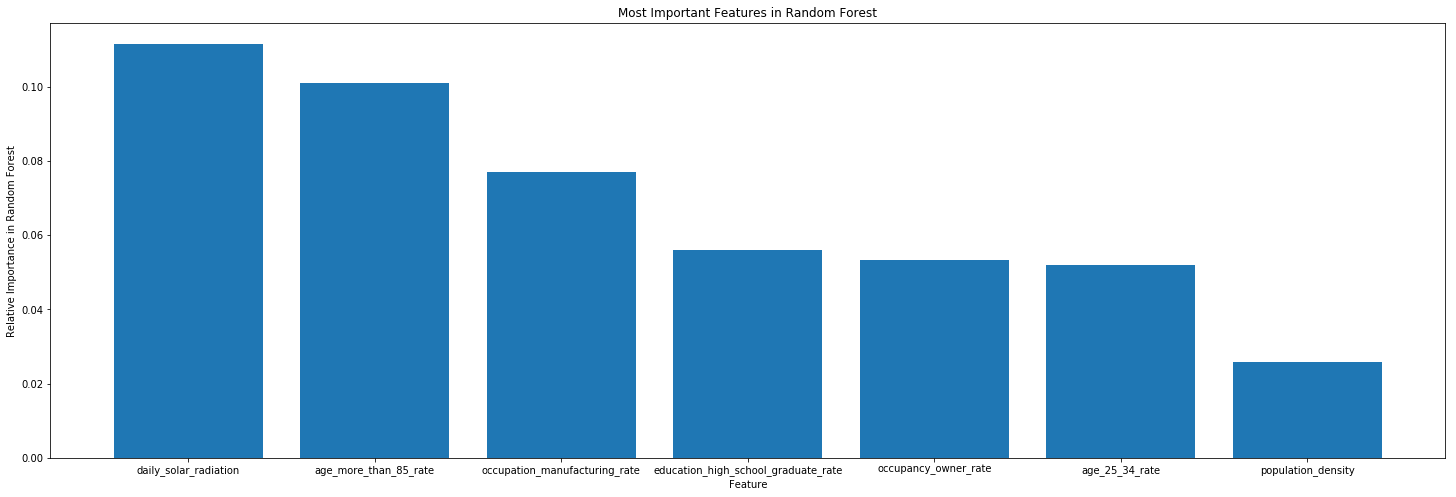

In [43]:
index=np.arange(7)
bar_width=0.35
fig,ax=plt.subplots(figsize=(25,8))
feature_importances=[i[1] for i in sorted_features[0:7]]
feature_names=[i[0] for i in sorted_features[0:7]]
ax.bar(index,feature_importances)
ax.set_xlabel('Feature')
ax.set_ylabel('Relative Importance in Random Forest')
ax.set_title('Most Important Features in Random Forest')
ax.set_xticks(index)
ax.set_xticklabels(feature_names,wrap=True)


plt.show()

In [17]:
import csv

with open('regressor_importances.csv','wt',newline='') as f:
    writer=csv.writer(f,delimiter=',')
    writer.writerow(['feature_name','importance_score'])
    
    for i in range(len(sorted_features)):
        writer.writerow([sorted_features[i][0],sorted_features[i][1]])
    
    f.close()

### Feature Importances Using Permutation Importance Calculation

In [12]:
rfp.importances(regressor,pd.DataFrame(X_test,columns=features),pd.DataFrame(yr_test,columns=['number_of_solar_system_per_household']))

,Importance
Feature,
daily_solar_radiation,0.415698
occupancy_owner_rate,0.183611
frost_days,0.103097
average_household_income,0.057242
population_density,0.050066
net_metering,0.034552
relative_humidity,0.033432
avg_electricity_retail_rate,0.031258
voting_2016_gop_percentage,0.027230


## Put it all Together

In [13]:
classifier_preds=classifier.predict(X_test)
classifier_preds[0:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [14]:
regressor_preds=regressor.predict(X_test)
regressor_preds[0:100]

array([2.38396328e-02, 1.48007773e-03, 1.75850104e-03, 4.85843748e-03,
       1.78278946e-02, 3.63258589e-03, 1.28157636e-02, 1.93705084e-03,
       4.95485183e-04, 4.29060118e-04, 1.54653014e-03, 5.21676560e-04,
       1.20932718e-03, 1.63102745e-03, 6.12400919e-02, 1.29092526e-03,
       1.47235755e-03, 5.41710590e-02, 1.02174171e-02, 1.20379183e-02,
       1.44415576e-03, 1.87100691e-03, 3.55944163e-03, 1.15929778e-03,
       9.51230548e-04, 2.96317034e-03, 1.11177056e-02, 1.79541623e-03,
       1.23697340e-02, 1.96935855e-02, 6.95371527e-02, 2.79337480e-02,
       4.17250443e-04, 1.64905830e-02, 1.14375214e-03, 1.38892317e-02,
       1.56249202e-02, 8.31945713e-04, 8.79356848e-03, 1.05867017e-03,
       6.45855187e-02, 5.22629381e-02, 3.36281275e-03, 2.12732382e-03,
       1.05258905e-02, 4.70755845e-04, 1.25236464e-03, 7.32838671e-02,
       3.83827868e-03, 6.26136976e-04, 1.64215292e-03, 1.74918632e-02,
       2.42180244e-03, 4.45423245e-03, 8.57288189e-03, 2.75364645e-02,
      

In [15]:
final_preds=regressor_preds*classifier_preds
final_preds[0:100]

array([0.02383963, 0.00148008, 0.0017585 , 0.00485844, 0.01782789,
       0.00363259, 0.01281576, 0.00193705, 0.        , 0.        ,
       0.00154653, 0.        , 0.00120933, 0.00163103, 0.06124009,
       0.00129093, 0.00147236, 0.05417106, 0.01021742, 0.01203792,
       0.00144416, 0.00187101, 0.        , 0.        , 0.00095123,
       0.00296317, 0.01111771, 0.        , 0.01236973, 0.01969359,
       0.06953715, 0.02793375, 0.        , 0.01649058, 0.00114375,
       0.01388923, 0.01562492, 0.00083195, 0.00879357, 0.00105867,
       0.06458552, 0.05226294, 0.00336281, 0.00212732, 0.01052589,
       0.00047076, 0.        , 0.07328387, 0.00383828, 0.00062614,
       0.00164215, 0.01749186, 0.0024218 , 0.00445423, 0.00857288,
       0.02753646, 0.00231643, 0.00164083, 0.        , 0.00649319,
       0.02516454, 0.00131021, 0.02360782, 0.00446444, 0.06604666,
       0.00139732, 0.0011761 , 0.        , 0.        , 0.02366024,
       0.00198913, 0.03257014, 0.00705922, 0.        , 0.00154

In [16]:
from sklearn.metrics import r2_score

In [17]:
yr_test.shape

(21329,)

In [18]:
final_preds.shape

(21329,)

In [17]:
r2_score(yr_test,final_preds)

0.6644472108688447

## Write Predictions to Output File

In [22]:
X.shape

(71095, 95)

In [23]:
classifier_preds=classifier.predict(X)
regressor_preds=regressor.predict(X)
final_preds=regressor_preds*classifier_preds

In [28]:
solar_full=solar[list(features)+['population']].replace([np.inf,' '],np.nan)
solar_full['number_of_solar_system_per_household']=solar['number_of_solar_system_per_household'].replace(np.inf,np.nan)
solar_full['fips']=solar['fips']
solar_full=solar_full.loc[(np.isfinite(solar_full['number_of_solar_system_per_household']))
                                   & (solar_full['population']>1000)]

solar_full=solar_full.assign(predicted_solar=final_preds)
solar_full.head(10)

,average_household_income,gini_index,population_density,education_less_than_high_school_rate,education_high_school_graduate_rate,education_college_rate,education_bachelor_rate,education_master_rate,education_professional_school_rate,education_doctoral_rate,...,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate,population,number_of_solar_system_per_household,fips,predicted_solar
0,70352.78987,0.3490,44.52005,0.073879,0.386324,0.371592,0.125110,0.034521,0.005717,0.002858,...,0,0,25,12,0,9.46,6577,0.000000,27145011200,0.000000
1,61727.08520,0.4074,482.64430,0.062836,0.217096,0.405887,0.190773,0.080668,0.012171,0.030569,...,0,0,25,12,0,9.46,8020,0.006726,27145011301,0.005468
2,71496.88658,0.3926,186.16730,0.064509,0.343973,0.325670,0.190625,0.061607,0.006696,0.006920,...,0,0,25,12,0,9.46,6971,0.001112,27145011302,0.001137
3,86840.15275,0.3949,84.13610,0.066840,0.316840,0.322917,0.185185,0.078125,0.010417,0.019676,...,0,0,25,12,0,9.46,6328,0.000000,27145011304,0.000000
4,89135.31560,0.4463,119.63230,0.048686,0.293309,0.392473,0.195341,0.050777,0.014934,0.004480,...,0,0,25,12,0,9.46,5264,0.002087,27145011400,0.000862
5,62225.90361,0.3847,43.87035,0.099371,0.425809,0.313624,0.117356,0.031924,0.006520,0.005396,...,0,0,25,12,0,9.46,6531,0.000000,27145011500,0.000000
6,41068.93617,0.7166,7818.25900,0.059932,0.203767,0.476027,0.083904,0.077055,0.044521,0.054795,...,0,0,25,12,0,9.46,3504,0.004255,27145011600,0.006808
7,74073.83367,0.4317,36.87569,0.104755,0.432161,0.335137,0.093545,0.020101,0.010437,0.003865,...,0,0,25,12,0,9.46,3874,0.000000,27145010500,0.000000
8,69412.19243,0.3824,43.64127,0.086355,0.425697,0.348983,0.110459,0.023475,0.003773,0.001258,...,0,0,25,12,0,9.46,7236,0.000000,27145011100,0.000000
9,82502.40707,0.3588,1080.02700,0.058705,0.210053,0.357549,0.290222,0.045863,0.036507,0.001101,...,0,0,25,12,0,9.46,8504,0.002742,27145010102,0.002343


In [35]:
relevant_fields=['number_of_solar_system_per_household']+list(features)+['fips']
final_frame=pd.merge(solar[relevant_fields],solar_full[['fips','predicted_solar']],on=['fips'],how='left')
final_frame.head(10)

,number_of_solar_system_per_household,average_household_income,gini_index,population_density,education_less_than_high_school_rate,education_high_school_graduate_rate,education_college_rate,education_bachelor_rate,education_master_rate,education_professional_school_rate,...,diversity,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate,fips,predicted_solar
0,0.000000,70352.78987,0.3490,44.52005,0.073879,0.386324,0.371592,0.125110,0.034521,0.005717,...,0.046960,34,0,0,25,12,0,9.46,27145011200,0.000000
1,0.006726,61727.08520,0.4074,482.64430,0.062836,0.217096,0.405887,0.190773,0.080668,0.012171,...,0.145934,34,0,0,25,12,0,9.46,27145011301,0.005468
2,0.001112,71496.88658,0.3926,186.16730,0.064509,0.343973,0.325670,0.190625,0.061607,0.006696,...,0.009150,34,0,0,25,12,0,9.46,27145011302,0.001137
3,0.000000,86840.15275,0.3949,84.13610,0.066840,0.316840,0.322917,0.185185,0.078125,0.010417,...,0.187334,34,0,0,25,12,0,9.46,27145011304,0.000000
4,0.002087,89135.31560,0.4463,119.63230,0.048686,0.293309,0.392473,0.195341,0.050777,0.014934,...,0.090766,34,0,0,25,12,0,9.46,27145011400,0.000862
5,0.000000,62225.90361,0.3847,43.87035,0.099371,0.425809,0.313624,0.117356,0.031924,0.006520,...,0.081981,34,0,0,25,12,0,9.46,27145011500,0.000000
6,0.004255,41068.93617,0.7166,7818.25900,0.059932,0.203767,0.476027,0.083904,0.077055,0.044521,...,0.470443,34,0,0,25,12,0,9.46,27145011600,0.006808
7,0.000000,74073.83367,0.4317,36.87569,0.104755,0.432161,0.335137,0.093545,0.020101,0.010437,...,0.008239,34,0,0,25,12,0,9.46,27145010500,0.000000
8,0.000000,69412.19243,0.3824,43.64127,0.086355,0.425697,0.348983,0.110459,0.023475,0.003773,...,0.029574,34,0,0,25,12,0,9.46,27145011100,0.000000
9,0.002742,82502.40707,0.3588,1080.02700,0.058705,0.210053,0.357549,0.290222,0.045863,0.036507,...,0.120052,34,0,0,25,12,0,9.46,27145010102,0.002343


In [39]:
r2_score(final_frame.loc[np.isfinite(final_frame['predicted_solar'])]['number_of_solar_system_per_household'],final_frame.loc[np.isfinite(final_frame['predicted_solar'])]['predicted_solar'])

0.76795294687616811

In [40]:
final_frame.to_csv('baseline_model_predictions.csv')

# Try Other Decision Tree Algorithms

### Gradient Boosting Classifier

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [7]:
classifier=GradientBoostingClassifier()
classifier.fit(X_train,yc_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [8]:
classifier.score(X_test,yc_test)

0.81379470506270324

In [11]:
regressor=GradientBoostingRegressor()
regressor.fit(X_train,yr_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [12]:
regressor.score(X_test,yr_test)

0.32123964790412141

In [14]:
regressor_preds=regressor.predict(X_test)
classifier_preds=classifier.predict(X_test)
final_preds=regressor_preds*classifier_preds
r2_score(yr_test,final_preds)

0.32472191340330459

## XGBoost

In [15]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [16]:
classifier=XGBClassifier()
classifier.fit(X_train,yc_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [17]:
classifier.score(X_test,yc_test)

0.81216906641895026

In [18]:
regressor=XGBRegressor()
regressor.fit(X_train,yr_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [19]:
regressor.score(X_test,yr_test)

0.30330564225161372

In [20]:
regressor_preds=regressor.predict(X_test)
classifier_preds=classifier.predict(X_test)
final_preds=regressor_preds*classifier_preds
r2_score(yr_test,final_preds)

0.27814778838778842

## Adaboost

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

In [22]:
classifier=AdaBoostClassifier(n_estimators=100)
classifier.fit(X_train,yc_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [23]:
classifier.score(X_test,yc_test)

0.80780306549001391

In [24]:
regressor=AdaBoostRegressor(n_estimators=100)
regressor.fit(X_train,yr_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=None)

In [25]:
regressor.score(X_test,yr_test)

-35.643734164492642

In [26]:
regressor_preds=regressor.predict(X_test)
classifier_preds=classifier.predict(X_test)
final_preds=regressor_preds*classifier_preds
r2_score(yr_test,final_preds)

-28.201460540731961

## Random Forest

In [27]:
classifier=RandomForestClassifier(n_jobs=-1)
classifier.fit(X_train,yc_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
classifier.score(X_test,yc_test)

0.79131444496052017

In [29]:
regressor=RandomForestRegressor(n_jobs=-1)
regressor.fit(X_train,yr_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [30]:
regressor.score(X_test,yr_test)

0.36700101017966047

In [31]:
regressor_preds=regressor.predict(X_test)
classifier_preds=classifier.predict(X_test)
final_preds=regressor_preds*classifier_preds
r2_score(yr_test,final_preds)

0.42858626503555475

# Neural Network

In [1]:
import tensorflow as tf
from IPython.display import display, clear_output 
import time

50) RMSE = 53.9115


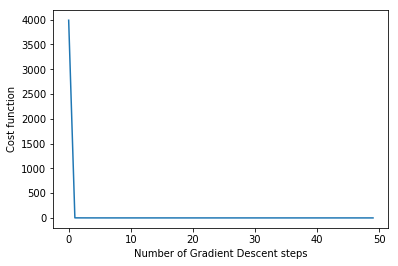

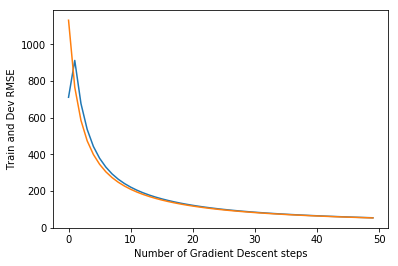

In [32]:
# (1) Parameters
tf.reset_default_graph()
hidden_layer_size=95
learning_rate=0.00001
batch_size=500
num_ex=X_train.shape[0]

# placeholder
x_=tf.placeholder(tf.float32,shape=[None,95],name='x')
y_=tf.placeholder(tf.float32,shape=[None],name='y')
is_training_ = tf.placeholder_with_default(True, shape=[], name='is_training')

#define model with one bow encoding layer, one hidden layer, and one output layer

def model(x_,hidden_layer_size,is_training=True):
    l1=tf.layers.dense(inputs=x_,units=hidden_layer_size,activation=tf.nn.relu)
    l2=tf.layers.dense(inputs=l1,units=hidden_layer_size,activation=tf.nn.relu)
    l3=tf.layers.dense(inputs=l2,units=hidden_layer_size,activation=tf.nn.relu)
    output_layer=tf.layers.dense(inputs=l3,units=1,activation=None)
    return tf.squeeze(output_layer)

#Define training op and optimizer
preds=model(x_,hidden_layer_size,is_training_)
#cc=tf.losses.mean_squared_error(y_,preds)
cc=tf.losses.absolute_difference(y_,preds)
gd=tf.train.GradientDescentOptimizer(learning_rate)
outputs=tf.identity(preds)

step=gd.minimize(cc)

#Calculate error
acc=tf.metrics.mean_squared_error(y_,preds)[1]



#Train the Neural network, report dev/training accuracies
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    cost_vec_avg = []
    acc_dev_vec = []
    acc_train_vec = []
    for i in range(50):
        cost_vec = []
        for start, end in zip(range(0, num_ex, batch_size), range(batch_size, num_ex, batch_size)):
            batch = X_train[start:end], yr_train[start:end]
            _, cost = sess.run([step, cc], feed_dict={x_: batch[0], y_: batch[1], is_training_: True})
            cost_vec.append(cost)

        dev_acc = acc.eval(feed_dict={x_: X_test, y_: yr_test, is_training_: False})
        train_acc = acc.eval(feed_dict={x_: X_train,y_: yr_train,is_training_: False})
        
        cost_vec_avg.append(np.mean(cost_vec))
        clear_output(wait=True)
        acc_dev_vec.append(dev_acc)
        acc_train_vec.append(train_acc)
        print('%d) RMSE = %.4f' %(i+1, dev_acc))
        
    reg_probas = preds.eval(feed_dict={x_: X_test,is_training_: False})
    
#plot the results
plt.plot(cost_vec_avg)  
plt.xlabel('Number of Gradient Descent steps')
plt.ylabel('Cost function')
plt.show()

plt.plot(acc_dev_vec)  
plt.plot(acc_train_vec)
plt.xlabel('Number of Gradient Descent steps')
plt.ylabel('Train and Dev RMSE')
plt.show()

In [33]:
reg_probas.shape

(21530,)

In [18]:
from sklearn.metrics import r2_score

In [34]:
r2_score(yr_test,reg_probas)

-6215.036731036904

In [35]:
reg_probas[0:1000]

array([ 1.6897633e-03,  1.6897633e-03,  1.6897633e-03,  1.6897633e-03,
        1.6897633e-03,  1.6897633e-03,  1.6897633e-03,  1.6897633e-03,
        1.6897633e-03,  1.6897633e-03,  1.6897633e-03,  1.6897633e-03,
        1.6897633e-03,  1.6897633e-03,  1.6897633e-03,  1.6897633e-03,
        1.6897633e-03,  1.6897633e-03,  1.6897633e-03,  1.6897633e-03,
        1.6897633e-03,  1.6897633e-03,  1.6897633e-03,  1.6897633e-03,
        1.6897633e-03,  1.6897633e-03,  1.6897633e-03,  1.6897633e-03,
        1.6897633e-03,  1.6897633e-03,  1.6897633e-03,  1.6897633e-03,
        1.6897633e-03,  1.6897633e-03,  1.6897633e-03,  1.6897633e-03,
        1.6897633e-03,  1.6897633e-03,  1.6897633e-03,  1.6897633e-03,
        1.6897633e-03,  1.6897633e-03,  1.6897633e-03,  1.6897633e-03,
        1.6897633e-03,  1.6897633e-03,  1.6897633e-03,  1.6897633e-03,
        1.6897633e-03,  1.6897633e-03,  1.6897633e-03,  1.6897633e-03,
        1.6897633e-03,  1.6897633e-03,  1.6897633e-03,  1.6897633e-03,
      

## Try with Keras

In [102]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
import keras.optimizers
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [1]:
NN_model = Sequential()
adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# The Input Layer :
NN_model.add(Dense(95, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(95, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(95, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(95, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(95, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='relu'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer=adam, metrics=['mean_absolute_error'])
NN_model.summary()

NameError: name 'Sequential' is not defined

In [128]:
NN_model.fit(X_train,yr_train, epochs=50, batch_size=500, validation_split = 0.2)

Train on 40188 samples, validate on 10048 samples
Epoch 1/200
40188/40188 [==============================] - 2s 50us/step - loss: 0.0074 - mean_absolute_error: 0.0074 - val_loss: 0.0072 - val_mean_absolute_error: 0.0072
Epoch 2/200
40188/40188 [==============================] - 1s 21us/step - loss: 0.0062 - mean_absolute_error: 0.0062 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069
Epoch 3/200
40188/40188 [==============================] - 1s 22us/step - loss: 0.0060 - mean_absolute_error: 0.0060 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068
Epoch 4/200
40188/40188 [==============================] - 1s 18us/step - loss: 0.0058 - mean_absolute_error: 0.0058 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066
Epoch 5/200
40188/40188 [==============================] - 1s 18us/step - loss: 0.0056 - mean_absolute_error: 0.0056 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065
Epoch 6/200
40188/40188 [==============================] - 1s 21us/step - loss: 0.0055 - mean_absolu

In [129]:
predictions=NN_model.predict(X_test)

In [89]:
predictions.shape

(21530, 1)

In [130]:
r2_score(yr_test,predictions)

0.3864399619257083

In [69]:
variable_means=X_train.mean(axis=0)
variable_mins=X_train.min(axis=0)
variable_maxes=X_train.max(axis=0)
variables=independent_vars.columns
for i in range(len(variables)):
    print(variables[i],variable_means[i],variable_mins[i],variable_maxes[i])

average_household_income 73377.03172097725 6910.984848 537130.2158
population_density 5340.80700908055 0.0104671 454706.9
education_less_than_high_school_rate 0.14013162111252905 0.0 1.0
education_high_school_graduate_rate 0.2837610962794401 0.0 1.0
education_college_rate 0.29004165060510445 0.0 1.0
education_bachelor_rate 0.17727308809286063 0.0 1.0
education_master_rate 0.07667837268892831 0.0 1.0
education_professional_school_rate 0.019129983086491654 0.0 0.419354839
education_doctoral_rate 0.012979688267995025 0.0 0.333333333
race_white_rate 0.7347847525537647 0.0 1.0
race_black_africa_rate 0.13752712489288565 0.0 1.0
race_indian_alaska_rate 0.008512351861175204 0.0 1.0
race_asian_rate 0.04517558083593426 0.0 0.913187541
race_islander_rate 0.0011590426024962162 0.0 0.151918257
race_other_rate 0.04448956522237019 0.0 0.8141263940000001
race_two_more_rate 0.028351582030416607 0.0 1.0
employ_rate 0.9111001438004104 0.0 1.0
poverty_family_below_poverty_level_rate 0.12852677355848383 0.

In [70]:
variable_means=X_test.mean(axis=0)
variable_mins=X_test.min(axis=0)
variable_maxes=X_test.max(axis=0)
variables=independent_vars.columns
for i in range(len(variables)):
    print(variables[i],variable_means[i],variable_mins[i],variable_maxes[i])

average_household_income 73120.01688015685 8256.756757 502289.4495
population_density 5445.203062732811 0.1074785 241752.3
education_less_than_high_school_rate 0.14075856360557343 0.0 1.0
education_high_school_graduate_rate 0.28409967560357596 0.0 1.0
education_college_rate 0.2894309809777987 0.0 1.0
education_bachelor_rate 0.17719148418457958 0.0 1.0
education_master_rate 0.07650058238318586 0.0 1.0
education_professional_school_rate 0.019115058357222495 0.0 0.31685678100000003
education_doctoral_rate 0.012903654888527604 0.0 0.373831776
race_white_rate 0.7310387699991624 0.0 1.0
race_black_africa_rate 0.13972865951788227 0.0 1.0
race_indian_alaska_rate 0.008503731762981838 0.0 0.9897172240000001
race_asian_rate 0.046290460750069845 0.0 0.8943362440000001
race_islander_rate 0.001185496734695773 0.0 0.24742268
race_other_rate 0.044859284848908436 0.0 1.0
race_two_more_rate 0.02839359638625209 0.0 0.422360248
employ_rate 0.9108084086107274 0.0 1.0
poverty_family_below_poverty_level_rate

# Scratch for model training script

In [2]:
max_depths=[15, 20, 30, None]
n_estimators=[100,150,200,300]

In [5]:
model_params=[(x,y,a,b) for x in max_depths for y in n_estimators for a in max_depths for b in n_estimators]
len(model_params)

256

In [6]:
[(x,y) for x in max_depths for y in n_estimators]

[(15, 100),
 (15, 150),
 (15, 200),
 (15, 300),
 (20, 100),
 (20, 150),
 (20, 200),
 (20, 300),
 (30, 100),
 (30, 150),
 (30, 200),
 (30, 300),
 (None, 100),
 (None, 150),
 (None, 200),
 (None, 300)]

In [8]:
int(50236/3)

16745

In [16]:
from sklearn.model_selection import KFold

folds=KFold(n_splits=3, random_state=None, shuffle=True)
for train_index, test_index in folds.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [    7     8     9 ... 71759 71760 71765] TEST: [    0     1     2 ... 71762 71763 71764]
TRAIN: [    0     1     2 ... 71763 71764 71765] TEST: [    8    10    11 ... 71753 71755 71760]
TRAIN: [    0     1     2 ... 71762 71763 71764] TEST: [    7     9    14 ... 71757 71759 71765]


In [20]:
test_index.shape

(23922,)

In [21]:
X.shape

(71766, 95)

In [23]:
X_test.shape

(23922, 95)

In [24]:
X_trains=[]
X_tests=[]
yr_trains=[]
yr_tests=[]
yc_trains=[]
yc_tests=[]

folds=KFold(n_splits=3, random_state=None, shuffle=True)
for train_index, test_index in folds.split(X):

    X_trains.append(X[train_index])
    X_tests.append(X[test_index])
    yr_trains.append(yr[train_index])
    yc_trains.append(yc[train_index])
    yr_tests.append(yr[test_index])
    yc_tests.append(yc[test_index])

In [26]:
X_trains[0]

array([[7.03527899e+04, 4.45200500e+01, 7.38786280e-02, ...,
        1.20000000e+01, 0.00000000e+00, 9.46000000e+00],
       [6.17270852e+04, 4.82644300e+02, 6.28361166e-02, ...,
        1.20000000e+01, 0.00000000e+00, 9.46000000e+00],
       [7.14968866e+04, 1.86167300e+02, 6.45089286e-02, ...,
        1.20000000e+01, 0.00000000e+00, 9.46000000e+00],
       ...,
       [9.01636119e+04, 2.62453900e+01, 2.33635024e-02, ...,
        1.10000000e+01, 0.00000000e+00, 9.82000000e+00],
       [4.51241530e+04, 1.35395500e+02, 2.05831904e-01, ...,
        0.00000000e+00, 0.00000000e+00, 7.86000000e+00],
       [5.68179969e+04, 7.75031000e+00, 1.57068063e-01, ...,
        0.00000000e+00, 0.00000000e+00, 7.86000000e+00]])

In [29]:
X_trains[1].shape

(47844, 95)

In [30]:
yr_trains[1].shape

(47844,)

In [31]:
yc_trains[1].shape

(47844,)

In [34]:
yc[0:10]

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1])

In [35]:
yr[0:10]

array([0.        , 0.00672646, 0.00111193, 0.        , 0.00208659,
       0.        , 0.00425532, 0.        , 0.        , 0.00274223])

In [36]:
X[0:10]

array([[7.03527899e+04, 4.45200500e+01, 7.38786280e-02, 3.86323659e-01,
        3.71591909e-01, 1.25109938e-01, 3.45206684e-02, 5.71679859e-03,
        2.85839930e-03, 9.76128934e-01, 2.88885510e-03, 2.43272009e-03,
        4.25726015e-03, 0.00000000e+00, 9.12270032e-04, 1.33799605e-02,
        9.63292848e-01, 4.44793302e-02, 6.80648991e-01, 1.77285319e-01,
        3.87811634e-02, 7.91452315e-02, 0.00000000e+00, 2.01820340e-02,
        3.95726157e-03, 2.58000000e+00, 1.92500000e+05, 8.14000000e+02,
        3.58000000e+02, 2.40700000e+01, 1.54000000e+02, 5.40000000e+00,
        6.95000000e-01, 3.76000000e+00, 9.74000000e+01, 4.40000000e+00,
        5.70000000e+00, 4.81000000e+03, 1.27800000e+03, 7.87593128e-02,
        9.50281283e-02, 8.05838528e-03, 4.63737266e-02, 1.09624449e-01,
        1.89600122e-01, 8.51452030e-02, 1.57670671e-01, 7.52622776e-02,
        4.51573666e-02, 6.47711723e-02, 7.56232687e-01, 1.00000000e+00,
        1.13757355e-01, 2.40963855e-02, 1.26085738e-02, 4.483048

In [41]:
X_trains[0][1]

array([6.17270852e+04, 4.82644300e+02, 6.28361166e-02, 2.17095952e-01,
       4.05887348e-01, 1.90772714e-01, 8.06679875e-02, 1.21709595e-02,
       3.05689216e-02, 9.23316708e-01, 2.55610973e-02, 2.86783042e-03,
       2.34413965e-02, 0.00000000e+00, 8.35411471e-03, 1.64588529e-02,
       9.53659507e-01, 1.39072848e-01, 8.06726457e-01, 1.69955157e-01,
       7.62331839e-03, 8.96860987e-03, 0.00000000e+00, 6.72645740e-03,
       0.00000000e+00, 2.75000000e+00, 1.57000000e+05, 7.33000000e+02,
       3.58000000e+02, 2.40700000e+01, 1.54000000e+02, 5.40000000e+00,
       6.95000000e-01, 3.76000000e+00, 9.74000000e+01, 4.40000000e+00,
       5.70000000e+00, 4.81000000e+03, 1.27800000e+03, 3.77182045e-01,
       1.08603491e-01, 9.97506234e-03, 3.95261845e-02, 9.58852868e-02,
       9.15211970e-02, 3.40399002e-02, 6.09725686e-02, 3.62842893e-02,
       2.43142145e-02, 6.17206983e-02, 6.09417040e-01, 9.66867470e-01,
       6.69447341e-02, 1.85610010e-02, 1.10531804e-02, 4.65067779e-02,
      

In [40]:
yr_trains[0][1]

0.0067264573991

In [42]:
yc_trains[0][1]

1

In [43]:
len(X_trains)

3

In [45]:
import csv

with open('solar_forest_gridsearch.csv','wt',newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['max_depth_c','n_est_c','max_depth_r','n_est_r','test_acc_1','test_acc_2','test_acc_3',
                     'test_f1_1','test_f1_2','test_f1_3','test_r2_1','test_r2_2','test_r2_3','overall_r2_1',
                     'overall_r2_2','overall_r2_3'])
    
    f.close() 